In [46]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

from find_walking_frames import find_walking_data
from pre_process import conv_acceleration, find_period_acf

directory = 'data/'

subject_num = '1'

In [47]:
sub_walks = find_walking_data(subject_num, directory)

walk_df = sub_walks['01_05'][1][['acc_rt_x','acc_rt_y','acc_rt_z','acc_lt_x','acc_lt_y','acc_lt_z']]

df_accel = pd.DataFrame(None)

for column in walk_df.columns:
    df_accel[column] = walk_df[column].apply(conv_acceleration)

df_accel = df_accel[200:(-1 - 200)]

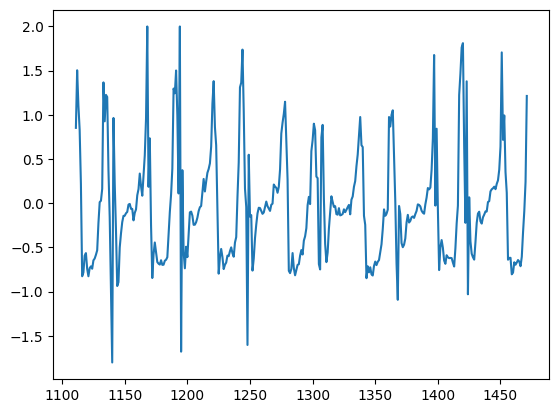

In [48]:
plt.plot(df_accel['acc_rt_z'])

In [49]:
period = find_period_acf(df_accel['acc_rt_y'], 150)

In [ ]:
# Find location of maximum of the first 1.75 periods

max_idx = np.argmax(df_accel['acc_rt_y'][0:7*period//4])

df_accel_4p = df_accel[57:57 + 4*period]

In [73]:
local_maxes = {}
local_mins = {}

wind_len = period//3

for i in range(1,len(df_accel_4p)-wind_len):
    local_maxes[i + np.argmax(df_accel_4p['acc_rt_y'][i:i + wind_len])]  = np.max(df_accel_4p['acc_rt_y'][i:i + wind_len])
    local_mins[i + np.argmin(df_accel_4p['acc_rt_y'][i:i + wind_len])] = np.min(df_accel_4p['acc_rt_y'][i:i + wind_len])

local_maxes, local_mins


({17: 0.47265625,
  29: 1.99993896484375,
  30: 1.02978515625,
  35: 0.27978515625,
  36: 0.1455078125,
  54: 0.40869140625,
  55: 0.36572265625,
  63: 0.345703125,
  77: 0.2861328125,
  82: 1.115234375,
  83: 1.0400390625,
  100: 0.16162109375,
  110: 0.24560546875,
  111: 0.2490234375,
  125: 0.35791015625,
  132: 0.5322265625,
  133: 0.6923828125,
  140: 1.2763671875,
  141: 1.4501953125,
  142: 0.29931640625,
  152: 0.2451171875,
  153: 0.21142578125,
  154: 0.18359375,
  163: 0.17138671875,
  164: 0.146484375,
  165: 0.06494140625,
  166: 0.02392578125,
  184: 0.00048828125,
  185: 0.109375,
  186: 0.3271484375,
  187: 0.5107421875,
  188: 0.6640625,
  202: 1.75439453125},
 {3: -0.52783203125,
  4: -0.35205078125,
  22: -0.5654296875,
  27: -0.74072265625,
  28: -1.15185546875,
  33: -0.58203125,
  47: -0.1826171875,
  59: -0.2177734375,
  75: -0.1015625,
  80: -0.767578125,
  81: -0.74951171875,
  87: -0.22265625,
  105: -0.1611328125,
  113: -0.66064453125,
  114: -0.82275390625